# Scenario Data Loading

This tutorial demonstrates how to load scenario data from the Waymo Open Motion Dataset (WOMD) using the Waymax dataloader.

In [1]:
%%capture
import numpy as np
import mediapy
from tqdm import tqdm
import dataclasses

from waymax import config as _config
from waymax import dataloader
from waymax import datatypes
from waymax import visualization

2024-06-12 16:10:00.215316: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT



We first create a dataset config, using the default configs provided in the `waymax.config` module. In particular, `config.WOD_1_1_0_TRAINING` is a pre-defined configuration that points to version 1.1.0 of the Waymo Open Dataset.

The data config contains a number of options to configure how and where the dataset is loaded from. By default, the `WOD_1_1_0_TRAINING` loads up to 128 objects (e.g. vehicles, pedestrians) per scenario. Here, we can save memory and compute by loading only the first 32 objects stored in the scenario.

We use the `dataloader.simulator_state_generator` function to create an iterator
through Open Motion Dataset scenarios. Calling next on the iterator will retrieve the first scenario in the dataset.


In [2]:
config = dataclasses.replace(_config.WOD_1_1_0_TRAINING, max_num_objects=32)
data_iter = dataloader.simulator_state_generator(config=config)
scenario = next(data_iter)

2024-06-12 16:10:06.100985: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.


Next, we can plot the initial state of this scenario. We use a matplotlib-based visualization available in the `waymax.visualization` package.

""

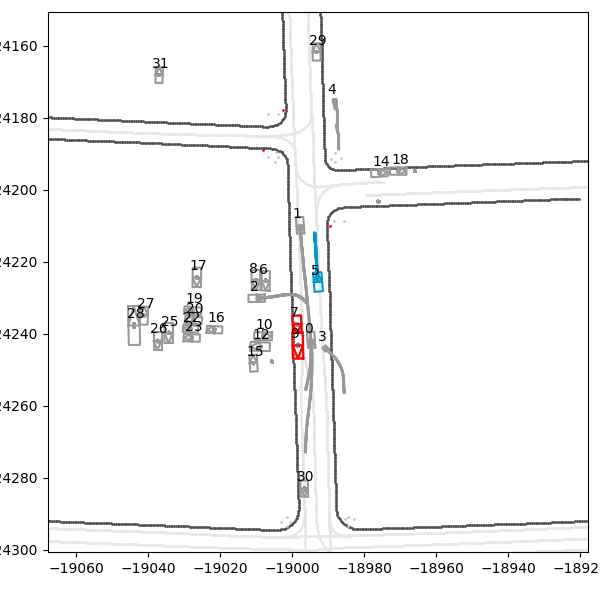

In [46]:
scenario = next(data_iter)

# Using logged trajectory to plot the initial state
img = visualization.plot_simulator_state(scenario, use_log_traj=True)
mediapy.show_image(img)

[ 6  6  6 ... -1 -1 -1]


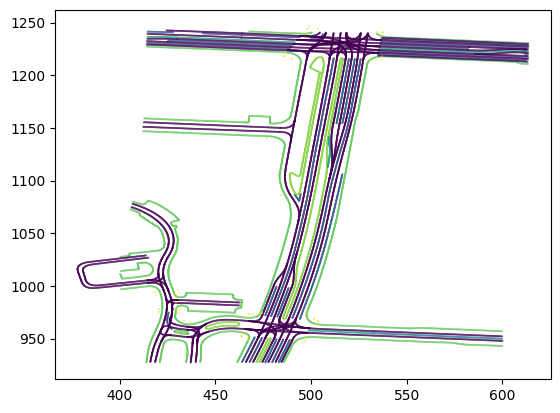

In [36]:
from matplotlib import pyplot as plt

# Plot the roadgraph, with colors corresponding to the road type.
rg_points = scenario.roadgraph_points

where_valid = rg_points.valid
plt.scatter(
    x = rg_points.x[where_valid],
    y = rg_points.y[where_valid],
    s=0.1,
    c = rg_points.types[where_valid]
)
plt.show()

In [42]:
# Only plot the road element with the same id
rg_
rg_points.dir_xy

Array([[ 0.26849243,  0.96327764],
       [ 0.26763037,  0.96351755],
       [ 0.26680633,  0.963746  ],
       ...,
       [-1.        , -1.        ],
       [-1.        , -1.        ],
       [-1.        , -1.        ]], dtype=float32)

The Waymo Open Motion Dataset consists of 9-second trajectory snippets. We can visualize the entire logged trajectory as a video as follows:

In [30]:
imgs = []

state = scenario
for _ in range(scenario.remaining_timesteps):
  state = datatypes.update_state_by_log(state, num_steps=1)
  imgs.append(visualization.plot_simulator_state(state, use_log_traj=True))

mediapy.show_video(imgs, fps=10)

In [ ]:
# if it is possible to check the roadgraph (not only the points)

